In [18]:
# Pull the data and create a csv
import pandas as pd
import yfinance as yf
from tabulate import tabulate

# List of specific ticker symbols to check for - Change per your holdings. 
specific_tickers = ['voo', 'voog', 'main', 'amzn', 'googl', 'sdiv', 'schw', 'pmt', 'lcid', 'vz', 'lqd', 'gehc', 'nwl']

# Initialize lists to store data
tickers = []
companies = []
sectors = []
industries = []
countries = []
market_caps = []
pes = []
prices = []
changes = []
volumes = []

# Loop through each ticker symbol
for ticker in specific_tickers:
    # Get Ticker object
    ticker_info = yf.Ticker(ticker)
    
    # Get relevant information
    ticker_info_data = ticker_info.info
    tickers.append(ticker)
    companies.append(ticker_info_data.get('longName', 'N/A'))
    sectors.append(ticker_info_data.get('sector', 'N/A'))
    industries.append(ticker_info_data.get('industry', 'N/A'))
    countries.append(ticker_info_data.get('country', 'N/A'))
    market_caps.append(ticker_info_data.get('marketCap', 'N/A'))
    pes.append(ticker_info_data.get('forwardPE', 'N/A'))
    
    # Fetch historical market data for the last trading day
    hist = ticker_info.history(period='1d')
    if not hist.empty:
        prices.append(hist['Close'].iloc[0])
        changes.append(hist['Close'].iloc[0] - hist['Open'].iloc[0])
        volumes.append(hist['Volume'].iloc[0])
    else:
        prices.append('N/A')
        changes.append('N/A')
        volumes.append('N/A')

# Create a DataFrame to store the collected data
data = {
    'Ticker': tickers,
    'Company': companies,
    'Sector': sectors,
    'Industry': industries,
    'Country': countries,
    'Market Cap': market_caps,
    'P/E': pes,
    'Price': prices,
    'Change': changes,
    'Volume': volumes
}
df = pd.DataFrame(data)

# Print DataFrame
print(tabulate(df, headers='keys', tablefmt='pretty'))

# Save DataFrame to CSV
df.to_csv('stock_data.csv', index=False)

+----+--------+-----------------------------------------------------+------------------------+--------------------------------+---------------+---------------+------------+--------------------+----------------------+----------+
|    | Ticker |                       Company                       |         Sector         |            Industry            |    Country    |  Market Cap   |    P/E     |       Price        |        Change        |  Volume  |
+----+--------+-----------------------------------------------------+------------------------+--------------------------------+---------------+---------------+------------+--------------------+----------------------+----------+
| 0  |  voo   |                Vanguard S&P 500 ETF                 |          N/A           |              N/A               |      N/A      |      N/A      |    N/A     | 463.6099853515625  |  -9.860015869140625  | 9278158  |
| 1  |  voog  |    Vanguard S&P 500 Growth Index Fund ETF Shares    |          N/A      

In [25]:
# Current Byline Sentiment Analysis
from tabulate import tabulate
import pandas as pd
from goose3 import Goose
from requests import get
from transformers import pipeline
import yfinance as yf
import os

# Function to get the sentiment of financial news articles for a given ticker
def get_ticker_news_sentiment(ticker):
    """
    Returns a Pandas DataFrame of the given ticker's most recent news article headlines,
    with the overall sentiment of each article.

    Args:
        ticker (string)

    Returns:
        pd.DataFrame: {'Date', 'Article title', 'Article sentiment', 'Ticker symbol'}
    """
    ticker_news = yf.Ticker(ticker)
    news_list = ticker_news.get_news()
    extractor = Goose()
    pipe = pipeline("text-classification", model="yiyanghkust/finbert-tone")

    data = []
    for dic in news_list:
        title = dic['title']
        url = dic['link']  # Extract the URL from the dictionary
        response = get(dic['link'])
        article = extractor.extract(raw_html=response.content)
        text = article.cleaned_text
        date = article.publish_date
        if len(text) > 2400:
            data.append({'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': 'NaN too long',
                         'Article URL': f'{url}',  # Include the URL in the data
                         'Ticker': f'{ticker}'
                        })
        else:
            results = pipe(text)
            data.append({'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': results[0]['label'],
                         'Article URL': f'{url}',  # Include the URL in the data
                         'Ticker': f'{ticker}'
                        })
    df = pd.DataFrame(data)
    return df

# Function to generate CSV file for a given ticker
def generate_csv(ticker):
    df = get_ticker_news_sentiment(ticker)
    print(tabulate(df, headers='keys', tablefmt='pretty'))
    df.to_csv(f'out/{ticker}.csv', index=False)

# Read ticker symbols from the output CSV file
output_csv = 'stock_data.csv'
if os.path.exists(output_csv):
    df_output = pd.read_csv(output_csv)
    specific_tickers = df_output['Ticker'].tolist()

    # Generating CSV for each ticker
    for ticker in specific_tickers:
        generate_csv(ticker)
else:
    print(f"Error: Output CSV file '{output_csv}' not found.")

+---+------+---------------------------------------------------------------------------------------+-------------------+-----------------------------------------------------------------------------------------------------+--------+
|   | Date |                                     Article title                                     | Article sentiment |                                             Article URL                                             | Ticker |
+---+------+---------------------------------------------------------------------------------------+-------------------+-----------------------------------------------------------------------------------------------------+--------+
| 0 | None | iShares Sees Second Consecutive Day of Net Outflows; ETF League Tables as of April 12 |     Positive      |      https://finance.yahoo.com/m/9e37ae2a-363b-38f1-9e40-146e570da36d/ishares-sees-second.html      |  voo   |
| 1 | None |                    Vanguard Names Europe Head on Heels of C

[*********************100%%**********************]  1 of 1 completed


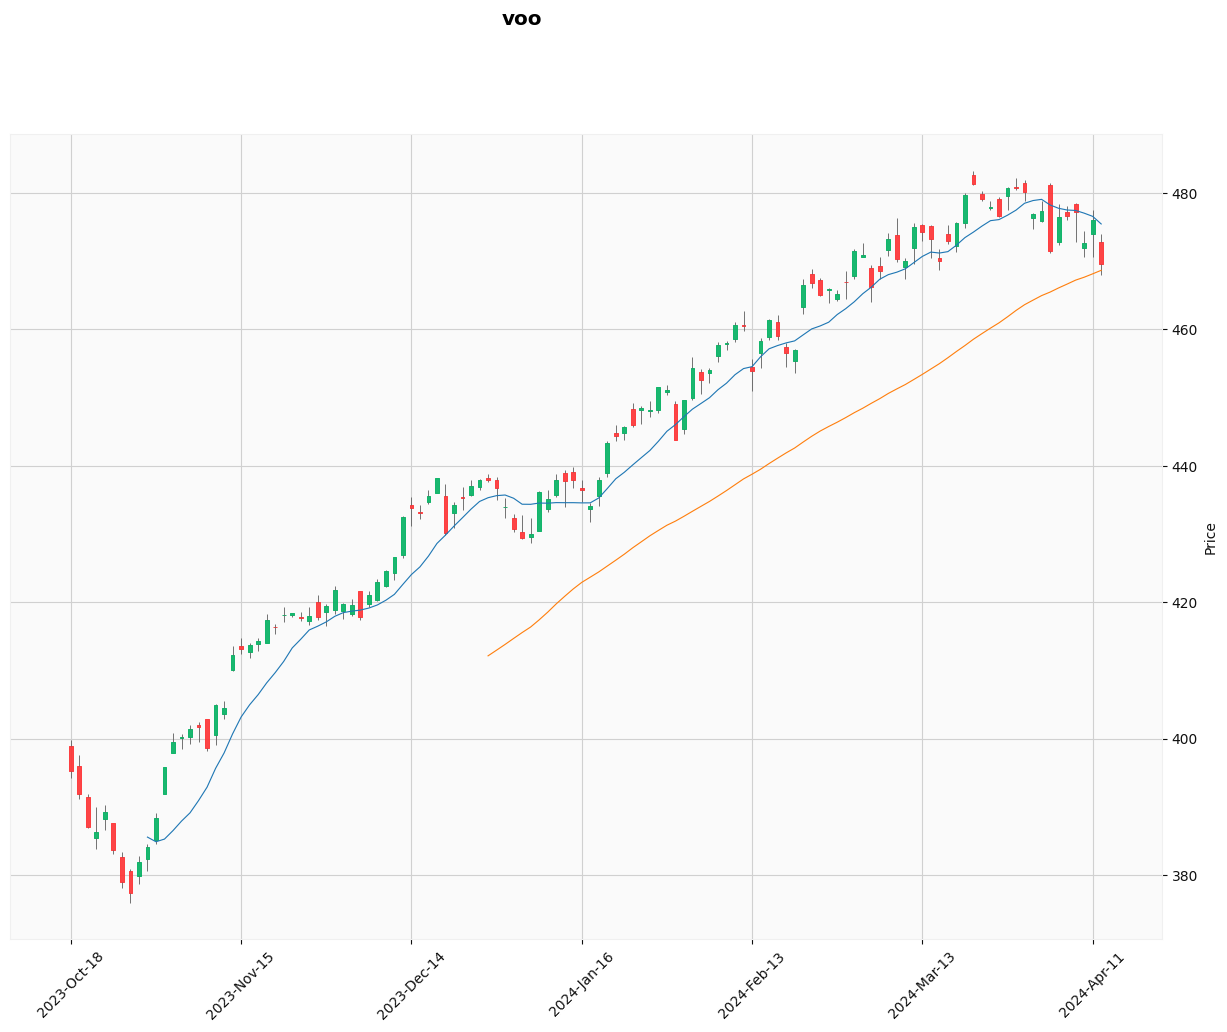

[*********************100%%**********************]  1 of 1 completed


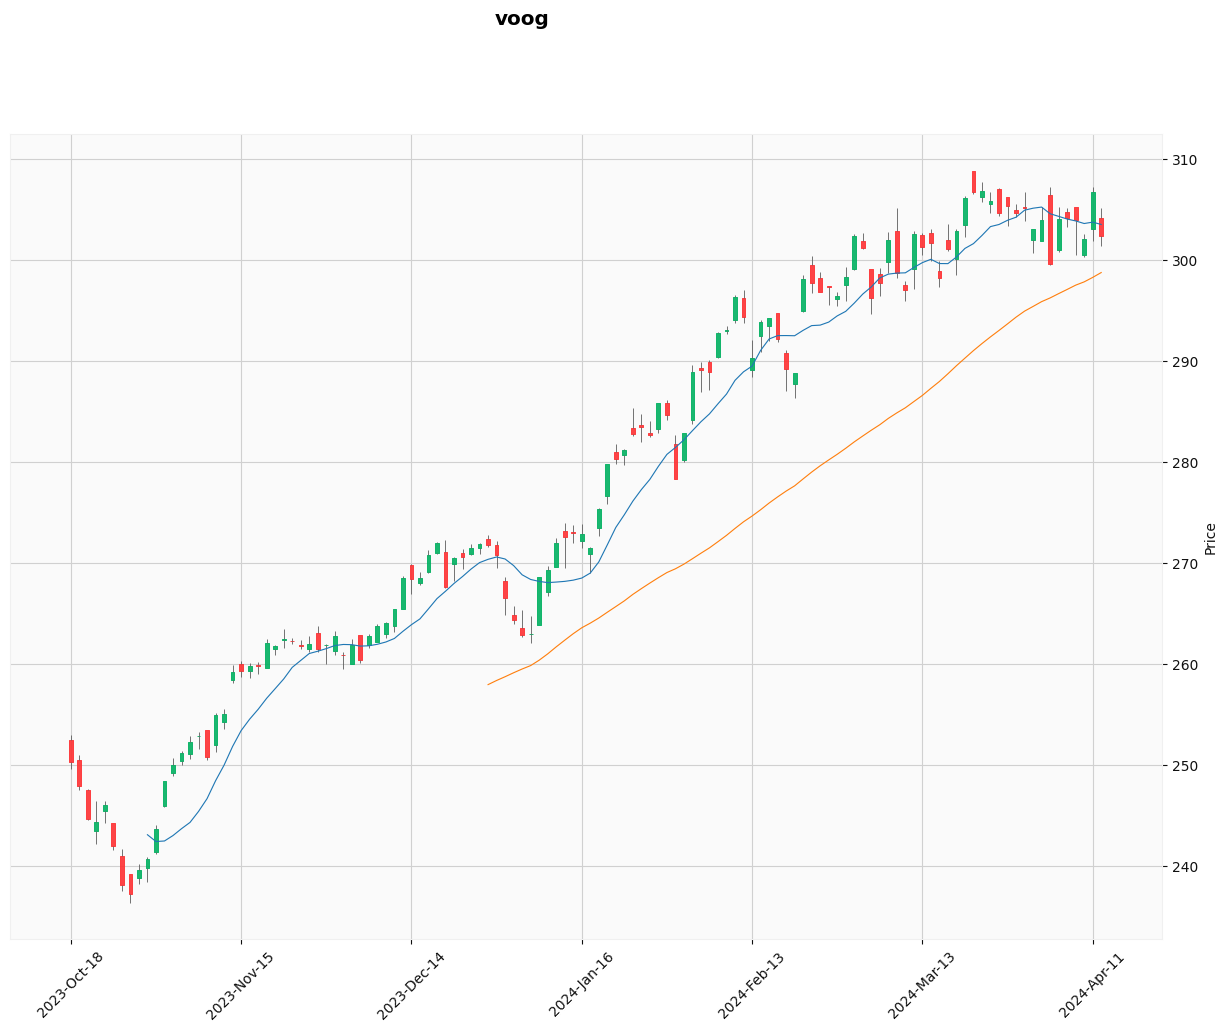

[*********************100%%**********************]  1 of 1 completed


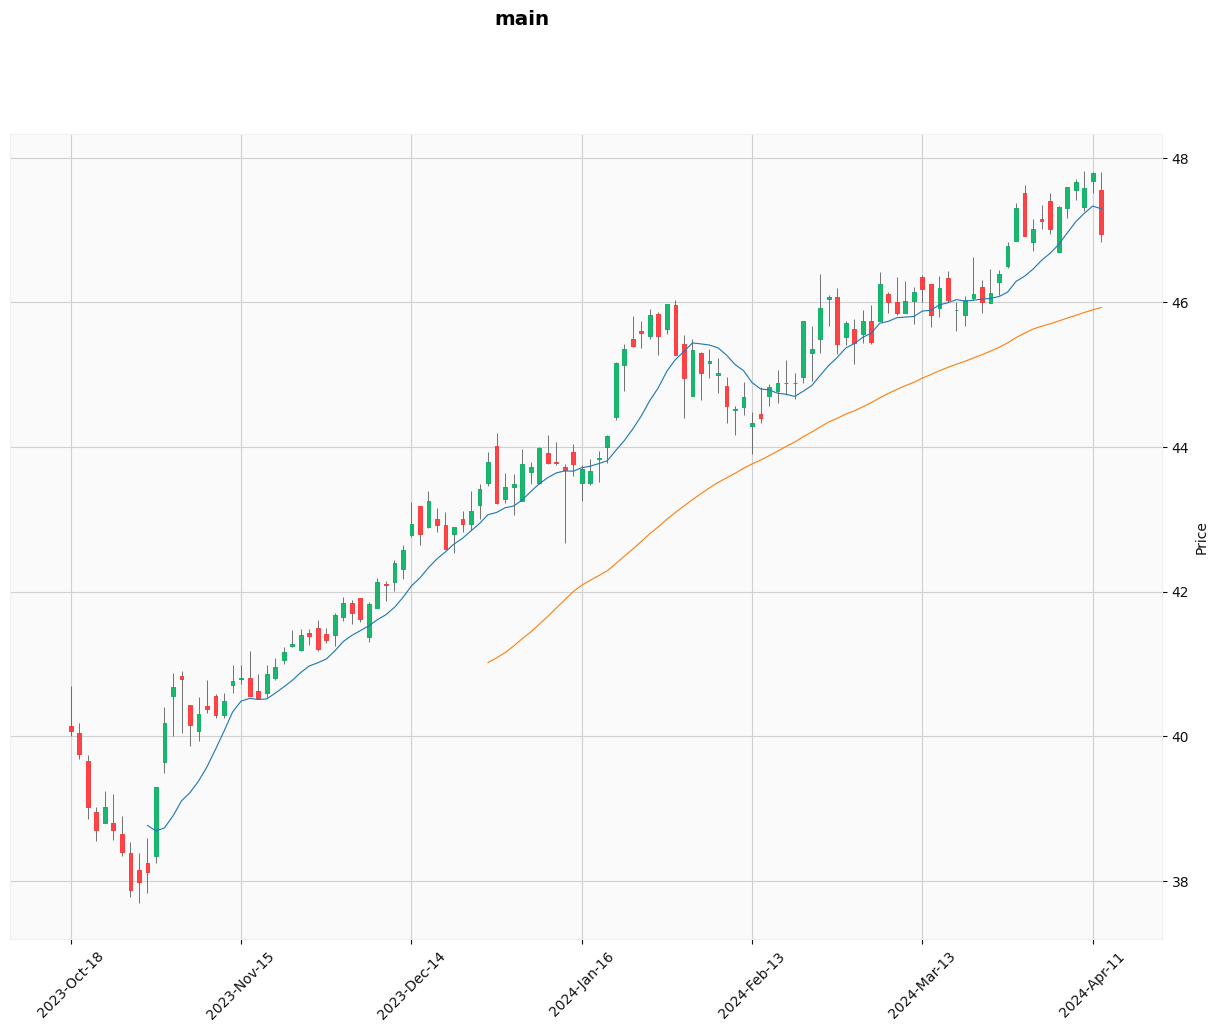

[*********************100%%**********************]  1 of 1 completed


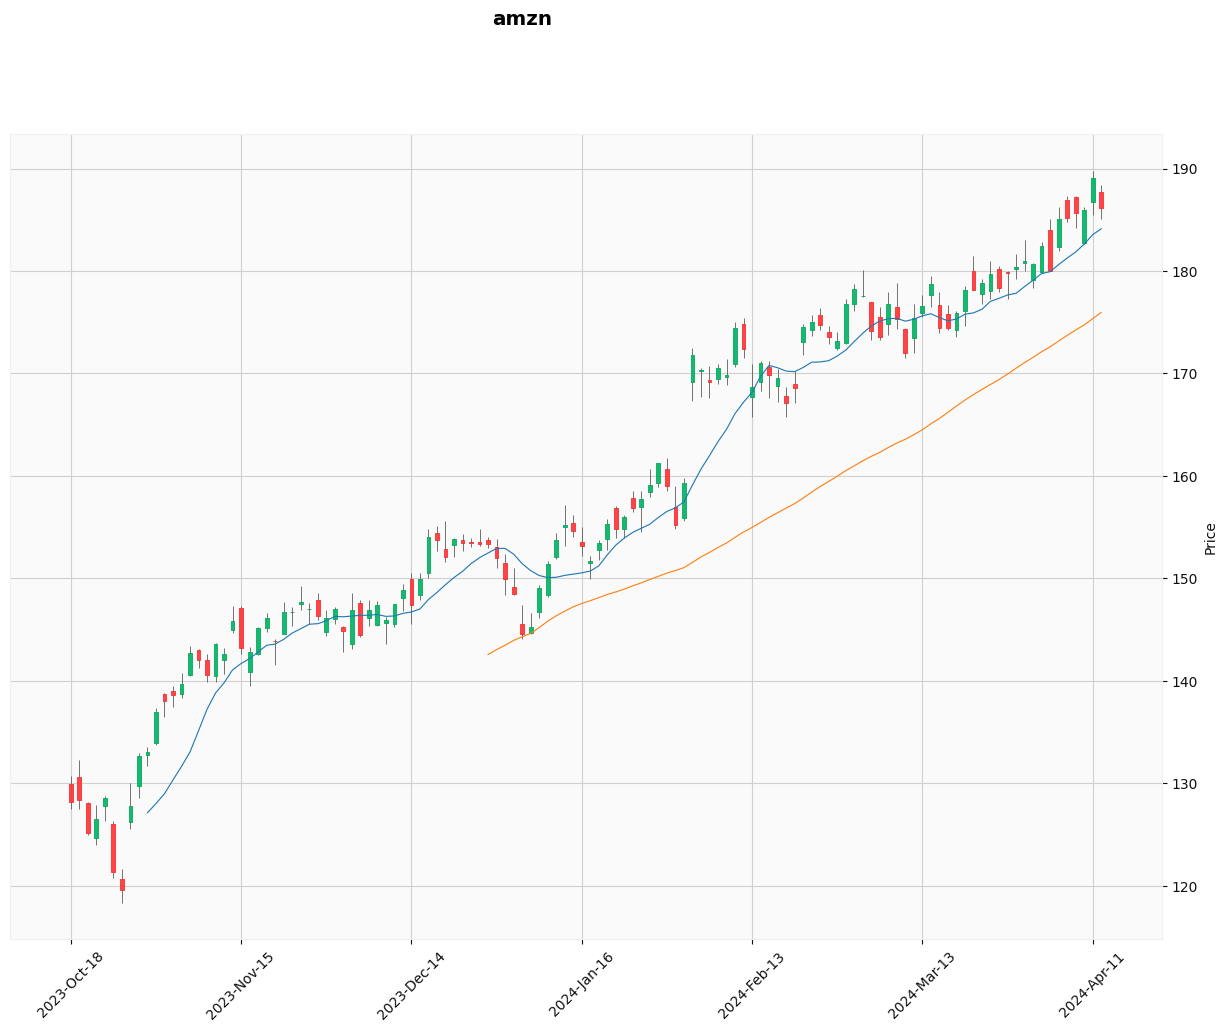

[*********************100%%**********************]  1 of 1 completed


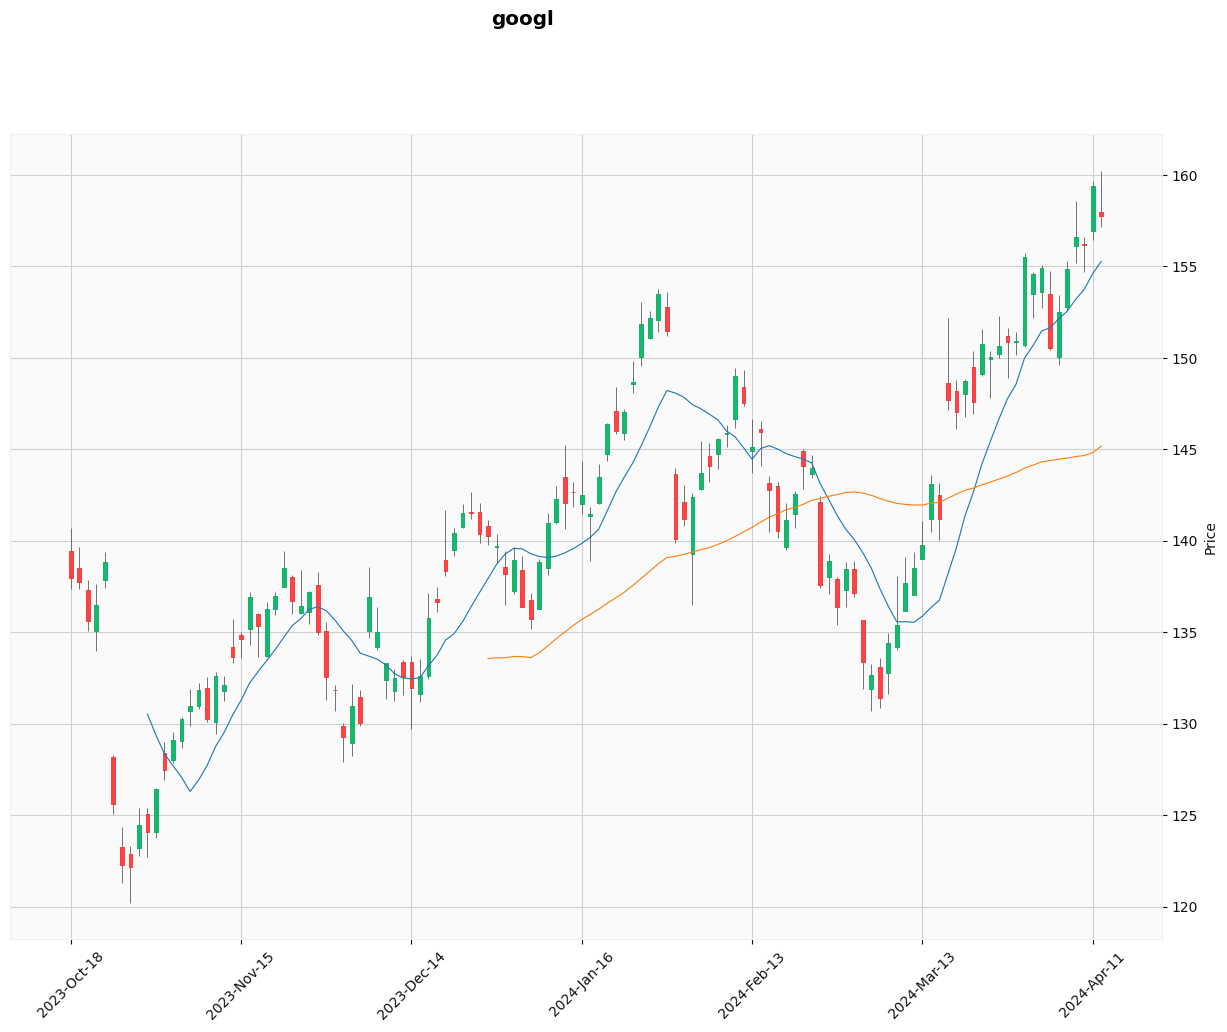

[*********************100%%**********************]  1 of 1 completed


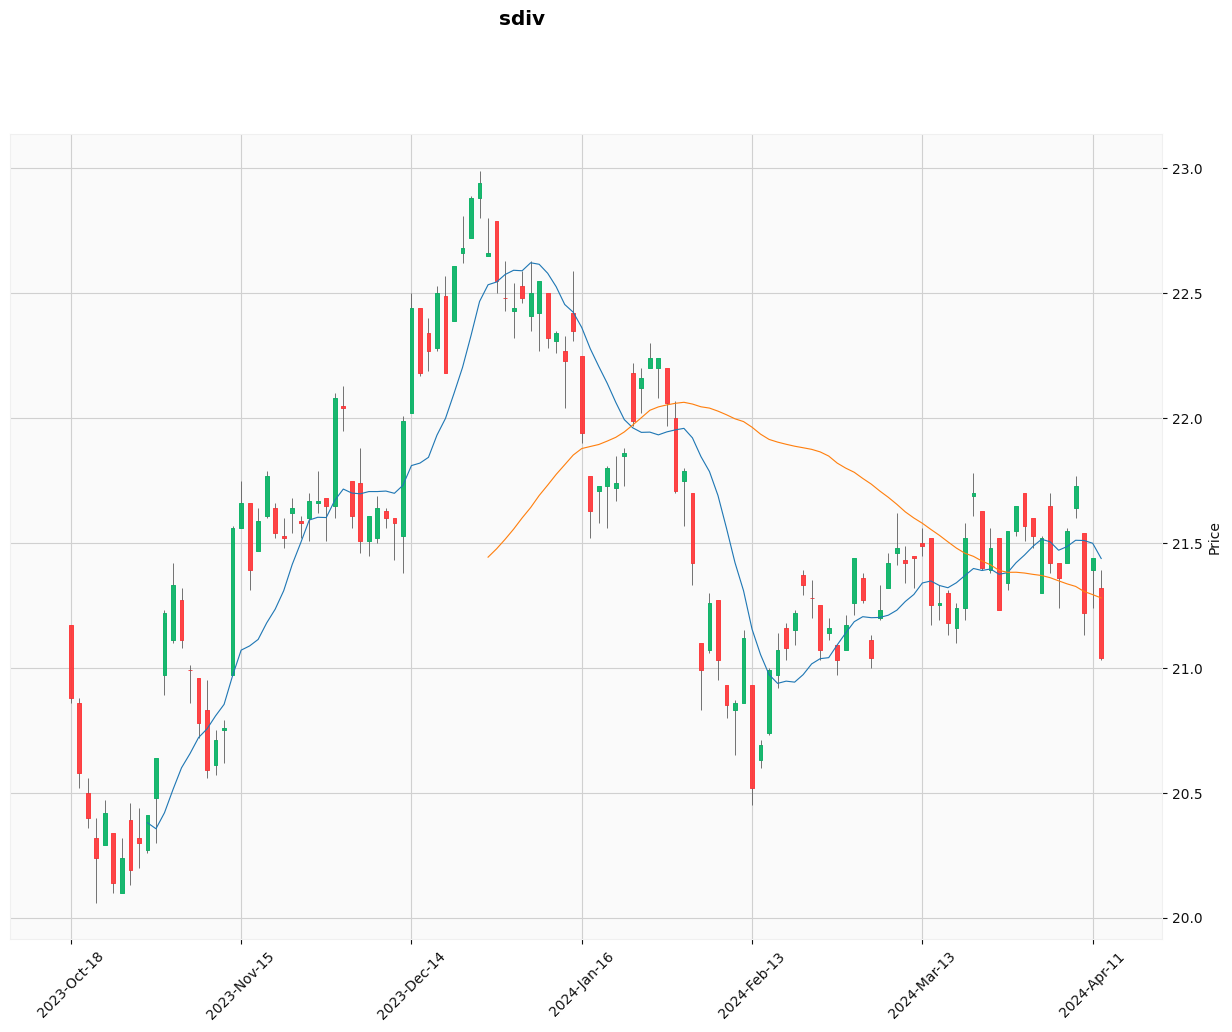

[*********************100%%**********************]  1 of 1 completed


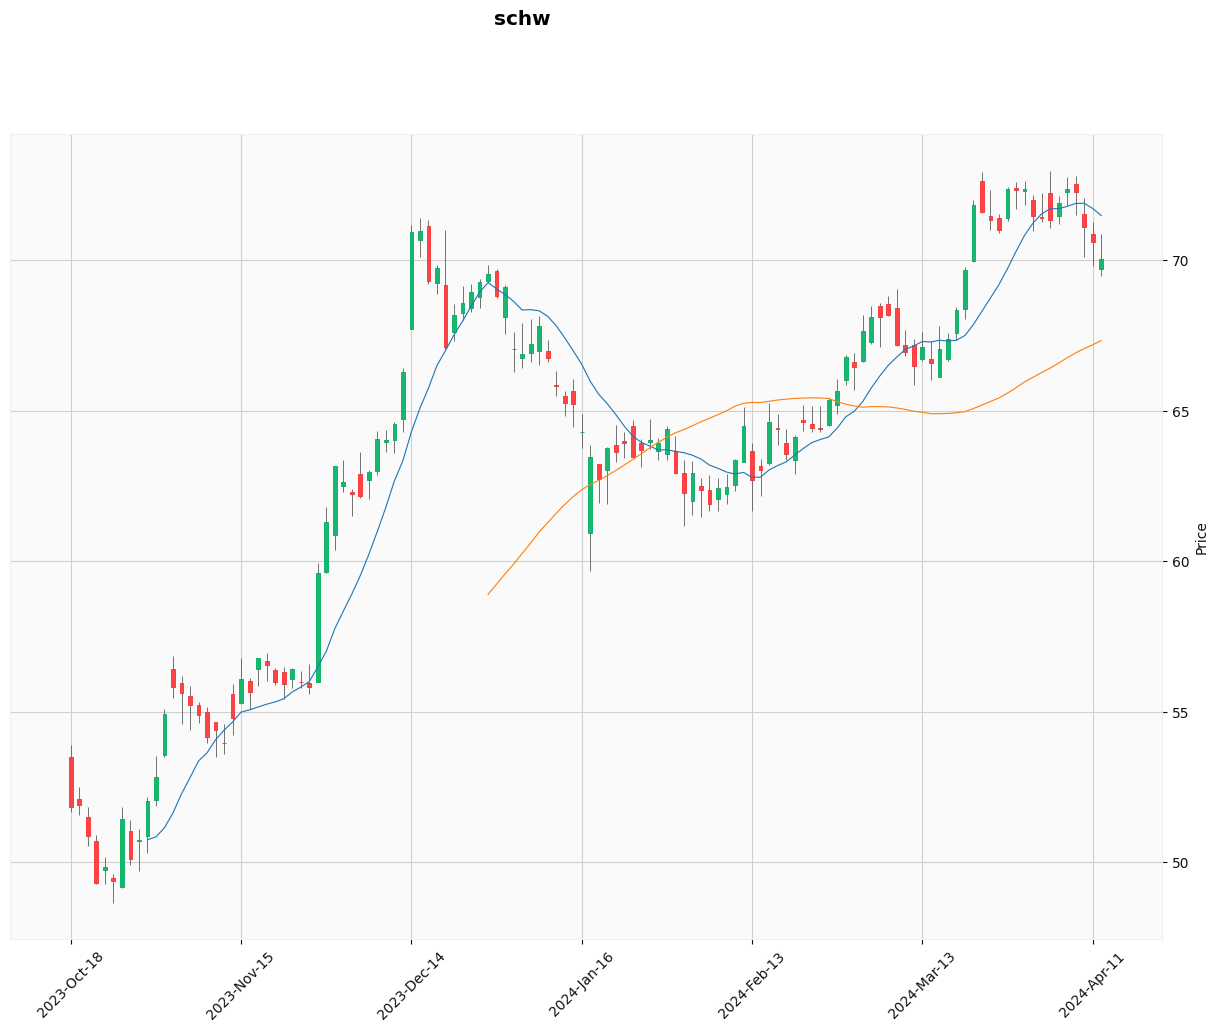

[*********************100%%**********************]  1 of 1 completed


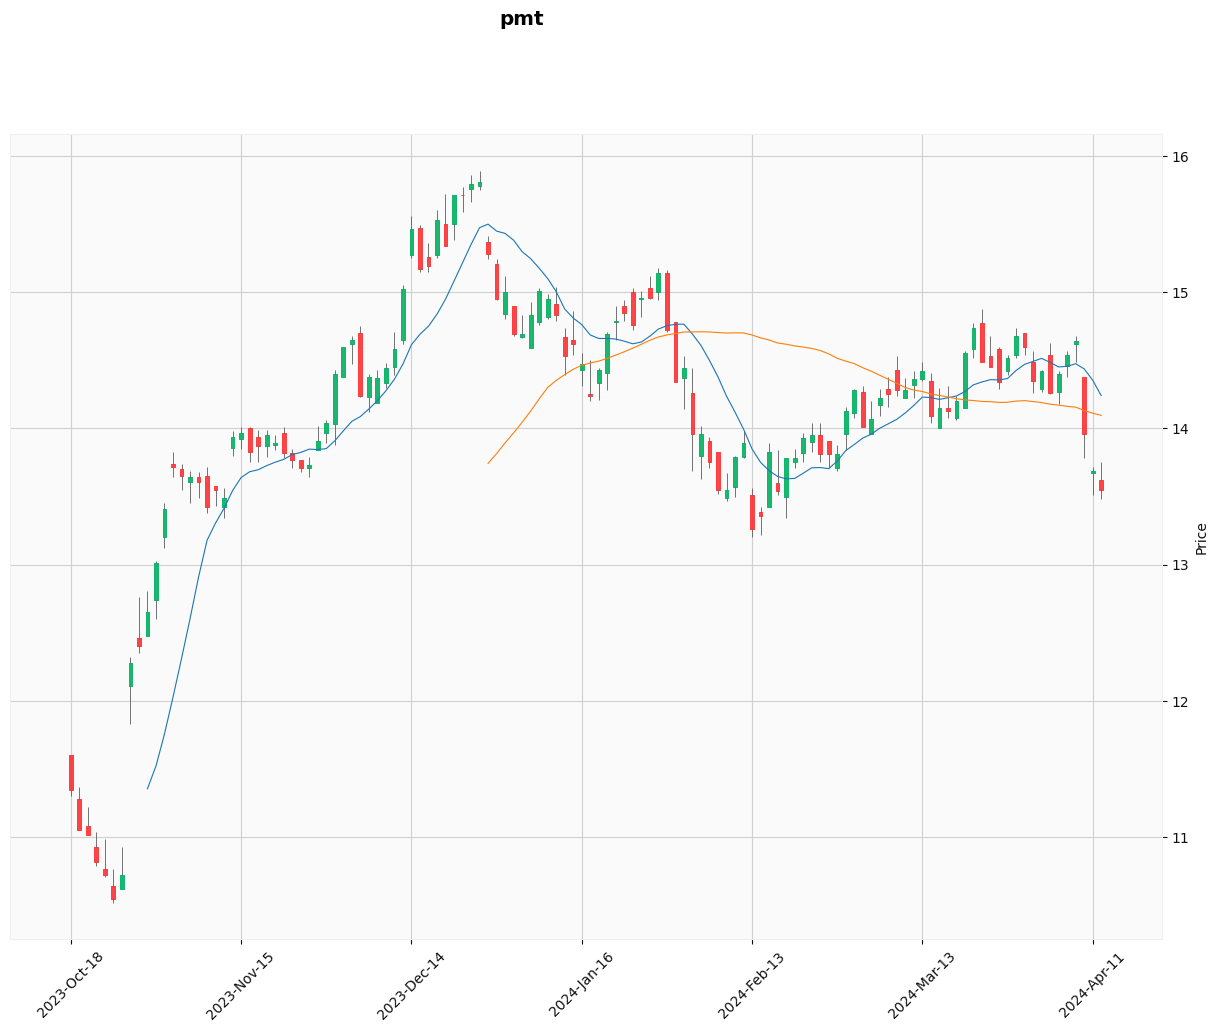

[*********************100%%**********************]  1 of 1 completed


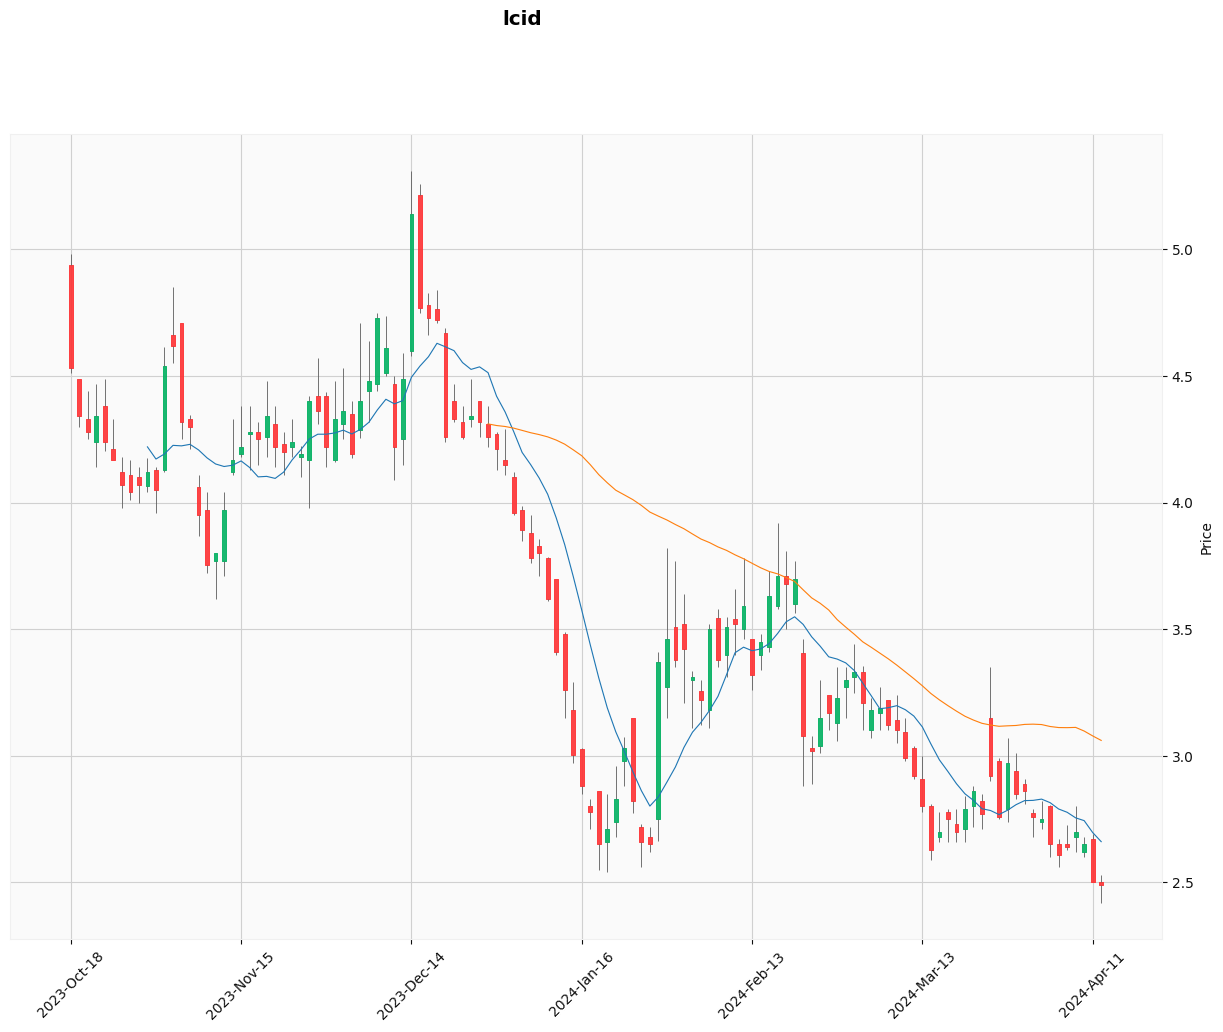

[*********************100%%**********************]  1 of 1 completed


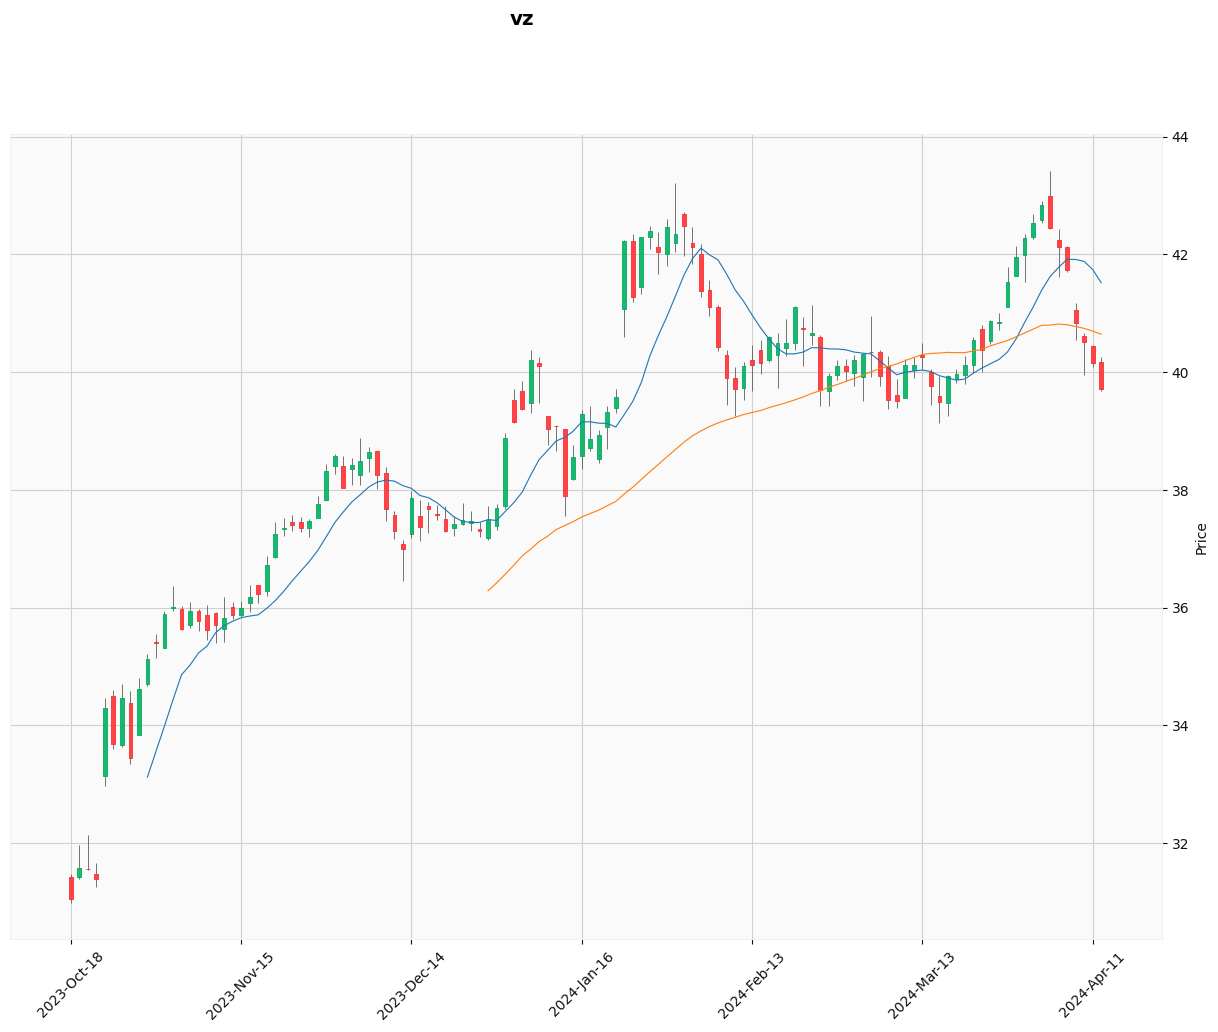

[*********************100%%**********************]  1 of 1 completed


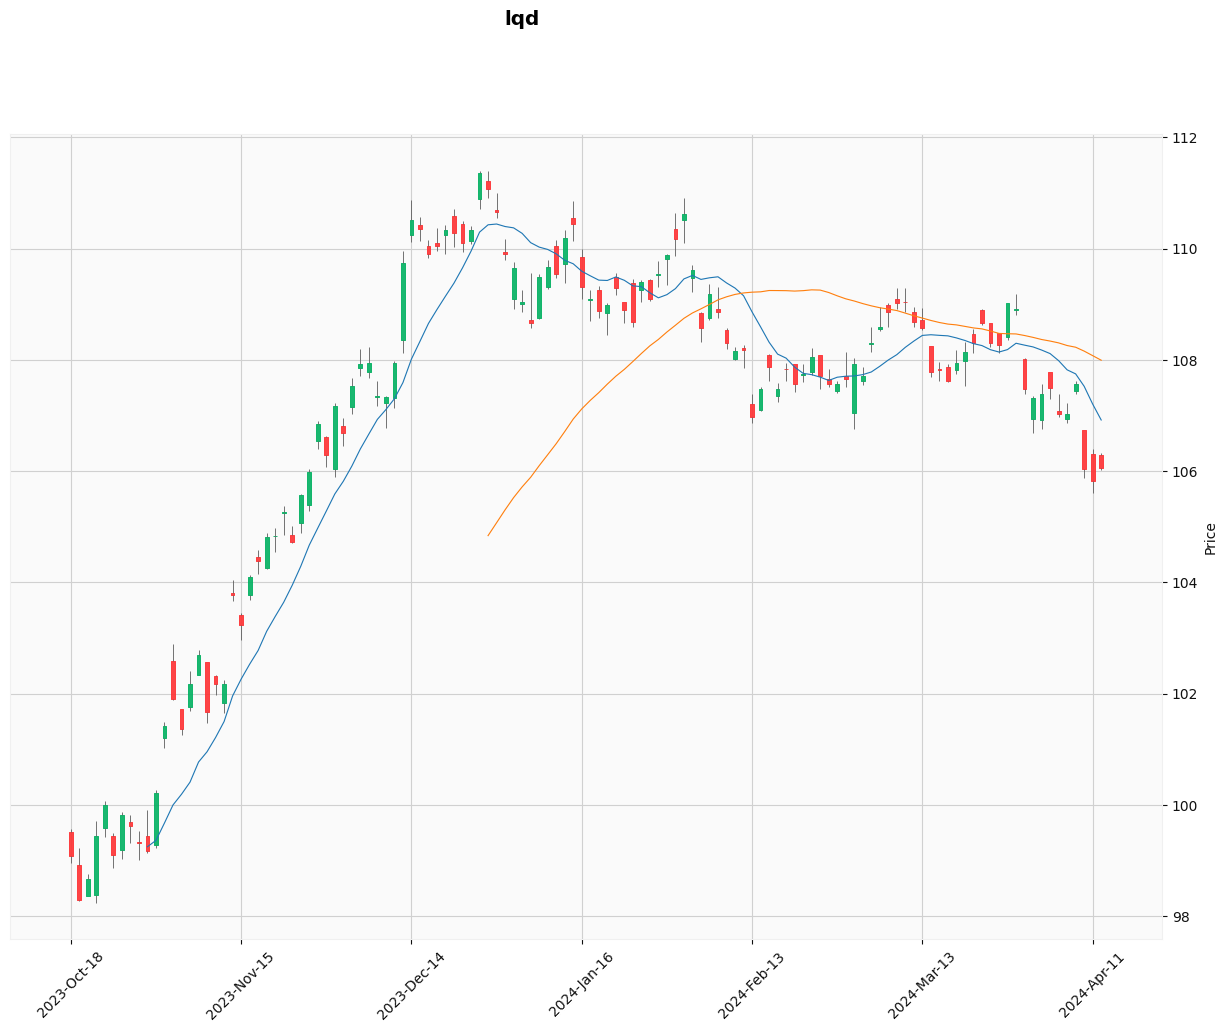

[*********************100%%**********************]  1 of 1 completed


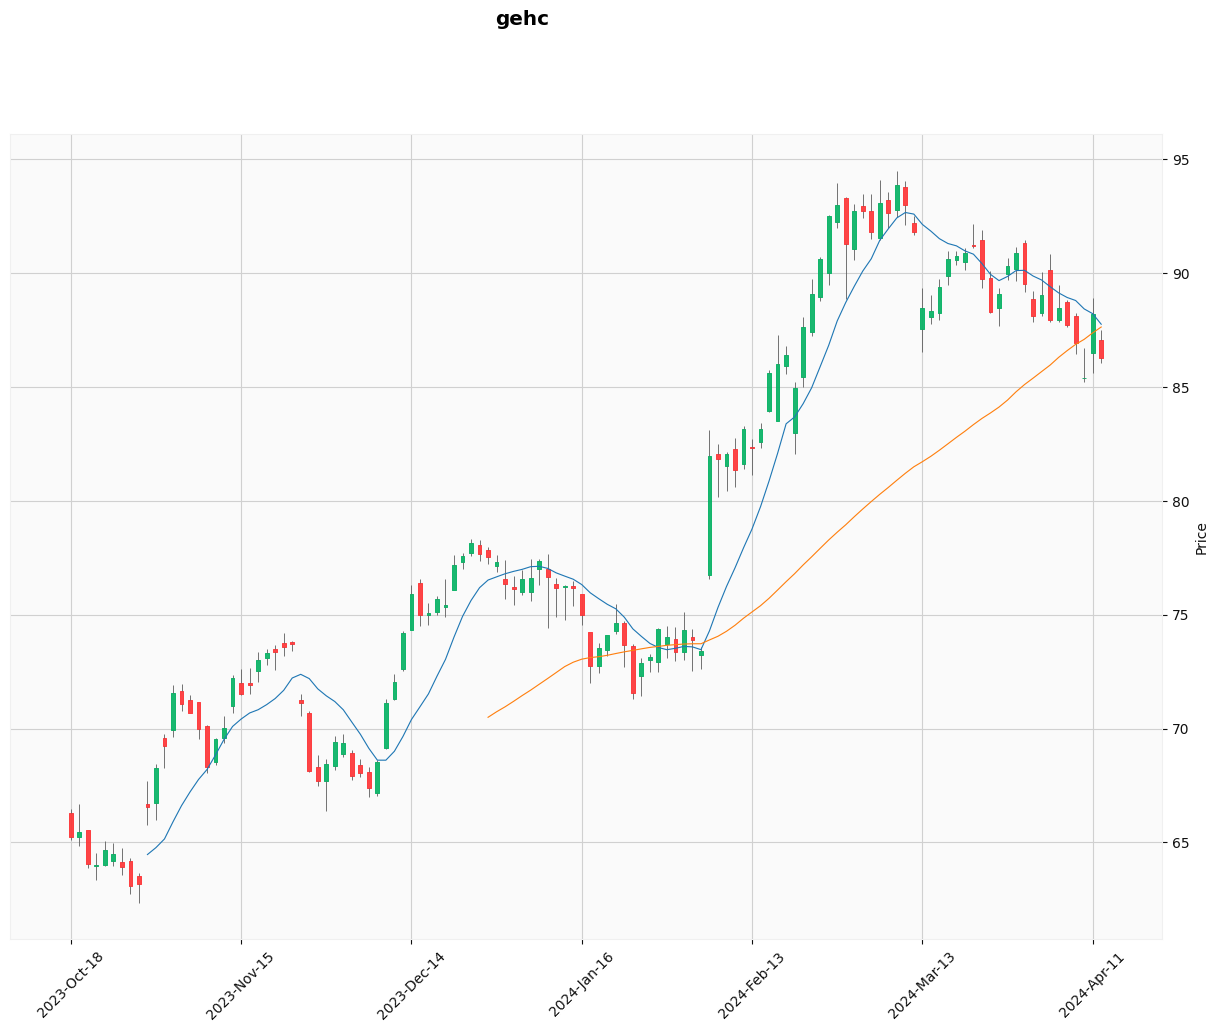

[*********************100%%**********************]  1 of 1 completed


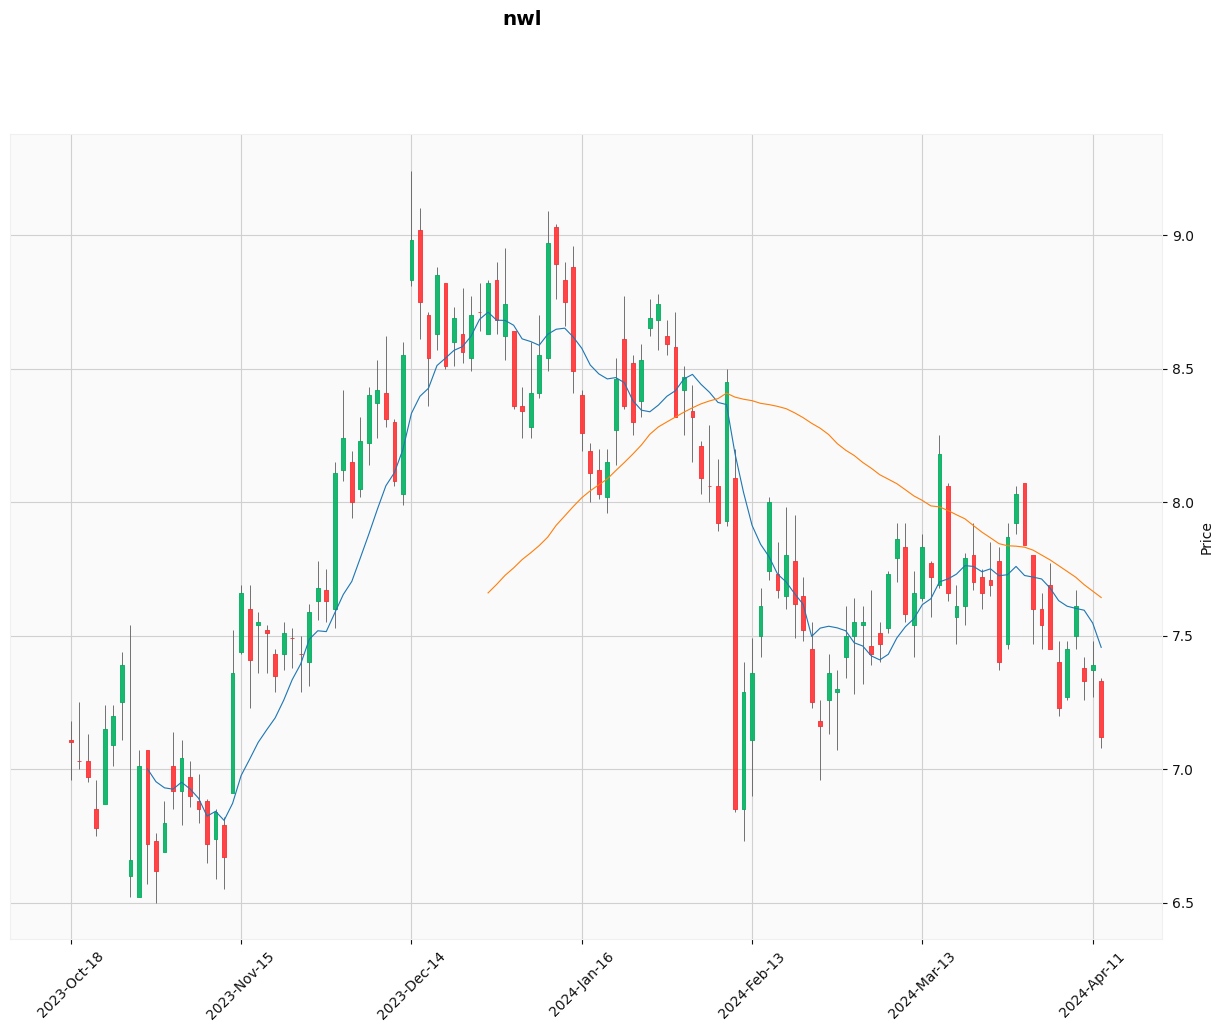

In [16]:
# 180 day Share Price Charts
import datetime
import pandas as pd
import yfinance as yf
import mplfinance as mpf
specific_tickers
def plot_line_chart(data, ticker_symbol):
    # Plot line chart
    mpf.plot(data, type='candle',mav=(10,50), style='yahoo', title=ticker_symbol, figscale=2)

# Read overview.csv into DataFrame
df = pd.read_csv('stock_data.csv')

# Extract tickers from the 'Ticker' column
tickers = df['Ticker']
company = df['Company']

# Iterate through each stock ticker in the DataFrame
for ticker_symbol in tickers:
    # Calculate start date as 180 days before the current date
    end_date = datetime.datetime.now().date()
    start_date = end_date - datetime.timedelta(days=180)
    
    # Get historical stock price data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    
    # Plot line chart for each stock
    plot_line_chart(data, ticker_symbol)



In [4]:
# Analyst Reccomndations 

# Import necessary libraries
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval, Exchange
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

us_exchanges = ["NYSE", "NASDAQ", "AMEX", "CHX", "BZX", "BX", "PHLX", "PSX"]

# Read overview.csv into DataFrame
df = pd.read_csv('stock_data.csv')

# Extract tickers from the 'Ticker' column
tickers = df['Ticker']

tickers_data = []

# Iterate through each ticker
for ticker in tickers:
    found_data = False
    
    # Iterate through each US exchange
    for exchange in us_exchanges:
        try:
            # Retrieve data for the ticker from the current exchange
            data = TA_Handler(
                symbol=ticker,
                screener="america",
                exchange=exchange,
                interval="1d"
            )
            data = data.get_analysis().summary
            tickers_data.append(data)
            
            # If data is found, set found_data to True and break out of the loop
            found_data = True
            break

        except Exception as e:
            # Print error message if no data is found for the ticker on the current exchange
            print(f"No data found for ticker {ticker} in {exchange}. Error: {e}")

    
    # If data is not found for any exchange, print a message
    if not found_data:
        print(f"No data found for ticker {ticker} on any US exchange.")

print("Data successfully imported.")

recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')
    
    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}

df = pd.DataFrame(data)
# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
df


No data found for ticker voo in NYSE. Error: Exchange or symbol not found.
No data found for ticker voo in NASDAQ. Error: Exchange or symbol not found.
No data found for ticker voog in NYSE. Error: Exchange or symbol not found.
No data found for ticker voog in NASDAQ. Error: Exchange or symbol not found.
No data found for ticker amzn in NYSE. Error: Exchange or symbol not found.
No data found for ticker googl in NYSE. Error: Exchange or symbol not found.
No data found for ticker sdiv in NYSE. Error: Exchange or symbol not found.
No data found for ticker sdiv in NASDAQ. Error: Exchange or symbol not found.
No data found for ticker lcid in NYSE. Error: Exchange or symbol not found.
No data found for ticker lqd in NYSE. Error: Exchange or symbol not found.
No data found for ticker lqd in NASDAQ. Error: Exchange or symbol not found.
No data found for ticker gehc in NYSE. Error: Exchange or symbol not found.
No data found for ticker nwl in NYSE. Error: Exchange or symbol not found.
Data suc

,Ticker,Recommendations,Buys,Sells,Neutrals
0,sdiv,STRONG_SELL,1,17,8
1,pmt,STRONG_SELL,1,16,9
2,lcid,STRONG_SELL,1,16,9
3,voo,SELL,4,13,9
4,voog,SELL,5,11,10
5,lqd,SELL,1,15,10
6,gehc,SELL,6,11,9
7,nwl,SELL,2,15,9
8,main,NEUTRAL,9,8,9
9,vz,NEUTRAL,8,11,7
